In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [2]:
import tensorflow as tf
print(tf.version.VERSION)

2.8.0


In [3]:
os.getcwd()

'f:\\crop'

In [4]:
labels = ['alluvial soil', 'black soil', 'desert soil', 'red soil','cinder soil']
img_size = 224

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir,label) 
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                # plt.imshow(resized_arr)
              
                data.append([resized_arr, class_num])
            except:
                print(Exception)
    return np.array(data,dtype=object)



In [5]:
train = get_data(r'dataset\train')
val= get_data(r'dataset\test')

In [6]:
print(len(val))

121


c:\python version\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

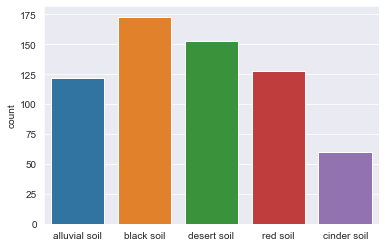

In [7]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("alluvial soil")
    elif (i[1] == 1):
        l.append("black soil")
    elif (i[1] == 2):
        l.append("desert soil")
    elif(i[1]==3):
        l.append("red soil")
    else:
        l.append("cinder soil") 
sns.set_style('darkgrid')
sns.countplot(l)

In [8]:
import random
random.shuffle(train)

In [9]:
from keras.utils import np_utils
xtrain = []
ytrain = []
xval = []
yval = []

for feature, label in train:
    xtrain.append(feature)
    ytrain.append(label)

for feature, label in val:
    xval.append(feature)
    yval.append(label)

xtrain = np.array(xtrain) / 255
xval = np.array(xval) / 255

xtrain.shape

(636, 224, 224, 3)

In [10]:


xtrain.reshape(-1, img_size, img_size, 3)
ytrain = np.array(ytrain)

xval.reshape(-1, img_size, img_size, 3)
yval = np.array(yval)

ytrain = keras.utils.np_utils.to_categorical(ytrain, 5)
yval = keras.utils.np_utils.to_categorical(yval, 5)


In [11]:
xtrain.shape

(636, 224, 224, 3)

In [12]:
print(len(xval))

121


In [13]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(xtrain)

In [14]:
xtrain.shape

(636, 224, 224, 3)

In [15]:
# model= keras.models.Sequential()
# model.add(keras.layers.Conv2D(kernel_size=(5,5), filters=32, activation='relu', input_shape=(224,224,3)))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Conv2D(filters=32,kernel_size = (5,5),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Conv2D(filters=64,kernel_size = (3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Conv2D(filters=64,kernel_size = (3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Flatten())

# model.add(keras.layers.Dense(128,activation='relu',input_shape = (224,224,3)))
# model.add(keras.layers.Dense(128,activation='relu'))
# model.add(keras.layers.Dense(5,activation = 'softmax'))
    
# model.compile(
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'],
#               optimizer='adam'
#              )


model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(224,224,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('softmax'))

model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5), 'categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 batch_normalization (BatchN  (None, 150528)           602112    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 5)                 752645    
                                                                 
 batch_normalization_1 (Batc  (None, 5)                20        
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 5)                 0         
                                                                 
Total params: 1,354,777
Trainable params: 1,053,711
Non-

In [17]:
history = model.fit(xtrain,ytrain,epochs = 5, validation_data = (xval, yval))

Epoch 1/5
20/20 [==============================] - 7s 237ms/step - loss: 1.4704 - accuracy: 0.4403 - val_loss: 2.1688 - val_accuracy: 0.1240
Epoch 2/5
20/20 [==============================] - 2s 105ms/step - loss: 1.1829 - accuracy: 0.5582 - val_loss: 1.5393 - val_accuracy: 0.2893
Epoch 3/5
20/20 [==============================] - 2s 106ms/step - loss: 1.0631 - accuracy: 0.6777 - val_loss: 1.4868 - val_accuracy: 0.3802
Epoch 4/5
20/20 [==============================] - 2s 107ms/step - loss: 0.9995 - accuracy: 0.7186 - val_loss: 1.4450 - val_accuracy: 0.5372
Epoch 5/5
20/20 [==============================] - 2s 101ms/step - loss: 0.9116 - accuracy: 0.7799 - val_loss: 1.4290 - val_accuracy: 0.5455


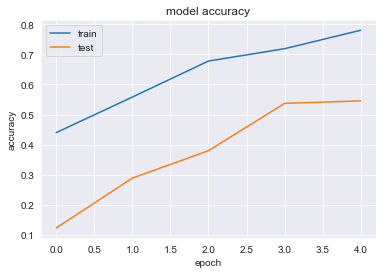

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

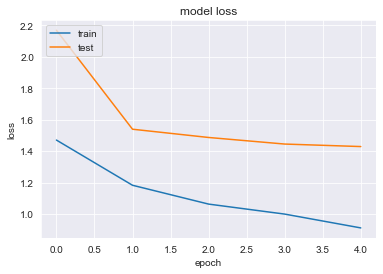

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Evaluating model on validation data
evaluate = model.evaluate(xval,yval)
print(evaluate)

4/4 [==============================] - 0s 15ms/step - loss: 1.4290 - accuracy: 0.5455
[1.4290118217468262, 0.5454545617103577]


In [21]:
checkImage = xval[0:1]
checklabel = yval[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'alluvial',1:'black',2:'desert',3:'red',4:'cinder'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  [[1. 0. 0. 0. 0.]]
Predicted :-  alluvial


In [22]:
model.save("soilClassify.h5")